In [1]:
#@title Run this to download the dataset
%%capture
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
!kaggle datasets download -d pratik2901/multiclass-weather-dataset
!unzip -q multiclass-weather-dataset.zip
!rm multiclass-weather-dataset.zip
!mv Multi-class\ Weather\ Dataset weather_dataset

#1) Data Loading and Preprocessing

After exploring the dataset structure, load and preprocess the data according to the following:
- *Read the images into memory. For each image also record its label.*
- *Resize the width and height of each image to (224, 224). All images must have a uniform shape.*
- *Handle image exeptions that are not strictly RGB.*
- *Scale the pixel values.*
- Stack the images into a single array X of shape (Number of samples, 224, 224, 3).
- Create an array y of labels. One-hot encode the labels. *italicised text*
- Split X and y into training and testing sets.

In [2]:
import os
import os.path as osp
from google.colab.patches import cv2
import numpy as np

path = 'weather_dataset'

X = []
y_i = []
dim = (224,224)
for category in os.listdir(path):
    for image_file in os.listdir(osp.join(path, category)):
        if os.path.exists(osp.join(path, category, image_file)) == True:
            img = cv2.imread(osp.join(path, category, image_file))
            if img is not None and len(img.shape) > 2:
              if img.shape[2] == 4 :                
                  print(len(img.shape))
                  img = img[:,:,:3]
                  img = cv2.resize(img,dim)
                  print(img.shape)
                  print(category)
                  X.append(img)
                  y_i.append(category)
              elif img.shape[2] == 3:
                  img = cv2.resize(img,dim)
                  X.append(img)
                  y_i.append(category)

X = np.array(X)
c = X.max()
X= X/c
y_i = np.array(y_i)

In [3]:
import pandas as pd
y = pd.get_dummies(y_i)
print(y.shape)
print(y)

(1123, 4)
      Cloudy  Rain  Shine  Sunrise
0          0     0      0        1
1          0     0      0        1
2          0     0      0        1
3          0     0      0        1
4          0     0      0        1
...      ...   ...    ...      ...
1118       0     1      0        0
1119       0     1      0        0
1120       0     1      0        0
1121       0     1      0        0
1122       0     1      0        0

[1123 rows x 4 columns]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [6]:
img_vec_size = X_train.shape[1] * X_train.shape[2] * 3
X_trainf = X_train.reshape(X_train.shape[0], img_vec_size)
X_testf = X_test.reshape(X_test.shape[0], img_vec_size)

print(X_trainf.shape)

(673, 150528)


In [7]:
print(X_trainf)

[[0.30588235 0.17254902 0.05882353 ... 0.49019608 0.43529412 0.44705882]
 [0.65490196 0.67058824 0.62745098 ... 0.01568627 0.05882353 0.01960784]
 [0.11372549 0.25490196 0.46666667 ... 0.14509804 0.14117647 0.14901961]
 ...
 [0.         0.         0.02352941 ... 0.         0.         0.        ]
 [0.45098039 0.5372549  0.49019608 ... 0.66666667 0.7254902  0.69411765]
 [0.2627451  0.30588235 0.29803922 ... 0.08235294 0.15686275 0.17647059]]


#2) Data Exploration

Explore the dataset by displaying a number of images along with their labels.

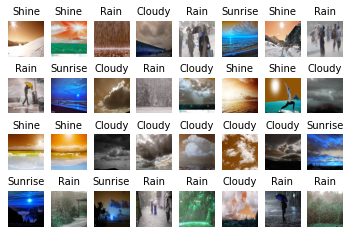

In [8]:
import matplotlib.pyplot as plt
from random import randint

for i in range (32):
  ax = plt.subplot(4,8, i+1)
  plt.axis('off')
  w = randint(0, X.shape[0])
  plt.imshow(X[w])
  plt.title(y_i[w], fontsize = 10)



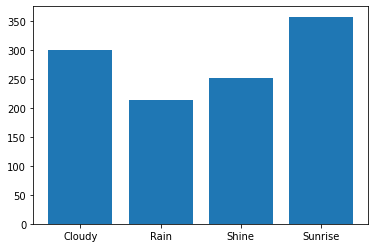

In [9]:
plt.bar(*np.unique(y_i, return_counts=True)); #checking distribution of the data

#3) Neural Network

- Build a fully connected neural network.
- Print the network's architecture.
- Train it on the data and show the training and validation loss curves.
- Play with the different hyperparameters (number of layer, number of neurons, optimizer, regularization, epochs, batch size...) until you obtain a satisfactory performance.

In [10]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.backend import clear_session

tf.random.set_seed(12)

clear_session()

model = Sequential()
model.add(Dense(250, activation = 'relu', input_shape=(img_vec_size,)))
model.add(Dense(120, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               37632250  
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30120     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 244       
Total params: 37,669,874
Trainable params: 37,669,874
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_trainf, y_train, epochs = 6, validation_split = 0.2)


Epoch 1/6
17/17 [==============================] - 4s 55ms/step - loss: 35.1221 - accuracy: 0.3736 - val_loss: 21.3326 - val_accuracy: 0.4148
Epoch 2/6
17/17 [==============================] - 1s 33ms/step - loss: 11.5535 - accuracy: 0.5762 - val_loss: 7.1240 - val_accuracy: 0.5630
Epoch 3/6
17/17 [==============================] - 1s 32ms/step - loss: 5.4603 - accuracy: 0.6468 - val_loss: 4.0460 - val_accuracy: 0.7630
Epoch 4/6
17/17 [==============================] - 1s 30ms/step - loss: 5.3041 - accuracy: 0.6970 - val_loss: 8.4349 - val_accuracy: 0.6074
Epoch 5/6
17/17 [==============================] - 1s 31ms/step - loss: 2.9134 - accuracy: 0.7379 - val_loss: 3.0992 - val_accuracy: 0.7185
Epoch 6/6
17/17 [==============================] - 0s 28ms/step - loss: 1.5519 - accuracy: 0.8197 - val_loss: 3.6979 - val_accuracy: 0.7111


- Compute the following evaluation metrics on the test set: accuracy, precision, recall and F1-score.

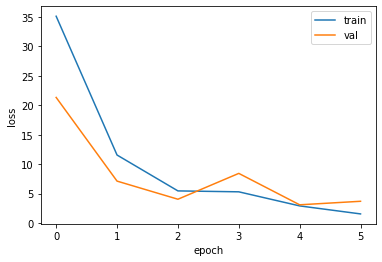

     0  1  2  3
0    0  0  0  1
1    1  0  0  0
2    0  0  0  1
3    0  0  1  0
4    0  0  1  0
..  .. .. .. ..
445  0  0  0  1
446  0  1  0  0
447  0  0  0  1
448  1  0  0  0
449  0  0  1  0

[450 rows x 4 columns]
      Cloudy  Rain  Shine  Sunrise
971        0     1      0        0
824        1     0      0        0
96         0     0      0        1
665        1     0      0        0
1064       0     1      0        0
...      ...   ...    ...      ...
7          0     0      0        1
1111       0     1      0        0
155        0     0      0        1
732        1     0      0        0
357        0     0      1        0

[450 rows x 4 columns]
0.7644444704055786
              precision    recall  f1-score   support

           0       0.93      0.48      0.63       113
           1       0.87      0.61      0.71        76
           2       0.54      0.98      0.70       109
           3       0.96      0.90      0.93       152

   micro avg       0.76      0.76      0.76      

In [12]:
from sklearn.metrics import classification_report

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

loss, accuracy = model.evaluate(X_testf, y_test, verbose=0)

y_pred =pd.get_dummies(np.argmax(model.predict(X_testf),axis = 1))

print(y_pred)
print(y_test)
print(accuracy)
print(classification_report(y_test, y_pred))

#4) Convolutional Neural Network

- Repeat the same steps as Question 3 but using a convolutional neural network.

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout

clear_session()

model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

Epoch 1/4
17/17 [==============================] - 32s 224ms/step - loss: 1.2548 - accuracy: 0.4554 - val_loss: 1.2586 - val_accuracy: 0.3630
Epoch 2/4
17/17 [==============================] - 2s 142ms/step - loss: 1.0593 - accuracy: 0.5186 - val_loss: 0.9518 - val_accuracy: 0.6370
Epoch 3/4
17/17 [==============================] - 2s 142ms/step - loss: 0.8333 - accuracy: 0.6208 - val_loss: 0.8305 - val_accuracy: 0.6370
Epoch 4/4
17/17 [==============================] - 2s 142ms/step - loss: 0.7981 - accuracy: 0.6394 - val_loss: 0.7883 - val_accuracy: 0.6593


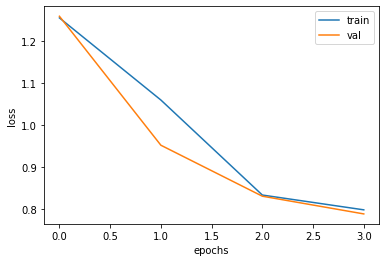

In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
y_pred =pd.get_dummies(np.argmax(model.predict(X_test),axis = 1))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72       113
           1       0.77      0.62      0.69        76
           2       0.86      0.57      0.69       109
           3       0.94      0.96      0.95       152

   micro avg       0.79      0.79      0.79       450
   macro avg       0.80      0.76      0.76       450
weighted avg       0.81      0.79      0.78       450
 samples avg       0.79      0.79      0.79       450



#5) Model Inference

- Download an image from the Internet and use your model to recognize the weather in the image.

(224, 224, 3)
0


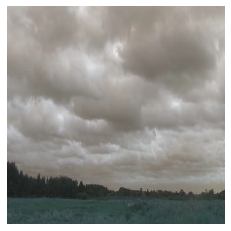

In [20]:
import numpy as np
import cv2  

img = cv2.imread("testpic.jpg")

plt.figure()
plt.axis('off')

img=cv2.resize(img,(224,224))

img = img[:,:,:3]
print(img.shape)

plt.imshow(img)

img=img.reshape(1,224,224,3)
print(np.argmax(model.predict(img)))